In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,mean_squared_error 
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("Bank.csv")
data.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
x=data.iloc[:,:7]
y=data.iloc[:,7]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
knncl=KNeighborsClassifier(n_neighbors=6)

In [ ]:
knncl.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred=knncl.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8988832240835154

In [ ]:
confusion_matrix(y_test,y_pred)

array([[7080,  245],
       [ 588,  325]])

In [ ]:
#to get the optimum K
K=range(1,11)
Errors=[]
for k in K :
  knncl=KNeighborsClassifier(n_neighbors=k)
  cvals=1-cross_val_score(knncl,x_train,y_train,cv=10,scoring="accuracy")
  Errors.append(cvals.mean())


In [ ]:
print(Errors)

[0.1176327769347496, 0.10628224582701065, 0.10500758725341426, 0.10191198786039454, 0.10078907435508347, 0.09863429438543249, 0.097298937784522, 0.09714719271623674, 0.09550834597875568, 0.09666160849772384]


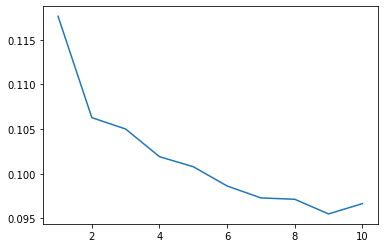

In [ ]:
plt.plot(K,Errors)

In [ ]:
knncl=KNeighborsClassifier(n_neighbors=9) #new model with optimized K

In [ ]:
df=pd.read_csv("Boston.csv")
df.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
x=df.iloc[:,:12]
y=df.iloc[:,12]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
model=KNeighborsRegressor(n_neighbors=6)

In [ ]:
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
root_mean_sq_error=np.sqrt(mean_squared_error(y_test,y_pred))
root_mean_sq_error

7.223677329533764

In [ ]:
K=range(1,11)
Errors=[]
for k in K :
  knnrg=KNeighborsRegressor(n_neighbors=k)
  cvals=1-cross_val_score(knnrg,x_train,y_train,cv=10,scoring="neg_mean_squared_error")
  Errors.append(cvals.mean())

In [ ]:
print(Errors)

[53.042018292682926, 38.77958368902439, 38.640875, 39.113605945121954, 36.350805073170726, 37.118372273035234, 38.49050792682927, 40.23665805068597, 41.00804046973803, 41.365746280487805]


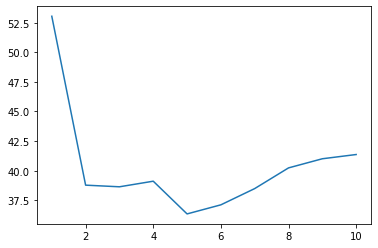

In [ ]:
plt.plot(K,Errors)

In [ ]:
model=KNeighborsRegressor(n_neighbors=5)# new model with optimized parameters

In [ ]:
model.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mean_sq_error=np.sqrt(mean_squared_error(y_test,y_pred))
mean_sq_error

7.1685161316280634